In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# df = pd.read_csv("./drive/MyDrive/idm_assignment/vehicles.csv")
df = pd.read_csv('./raw_data/vehicles.csv')

# Preprocess the data

## Cleaning Data

### Drop unimportant columns

In [4]:
df = df[[
    'price',
    'year',
    'manufacturer',
    'condition',
    'cylinders',
    'fuel',
    'odometer',
    'title_status',
    'transmission',
    'drive',
    'size',
    'type',
    'paint_color',
]]

In [5]:
# calculating the null percentage per column
df.isna().sum() / len(df) * 100

price            0.000000
year             0.282281
manufacturer     4.133714
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
dtype: float64

### drop any row has a null value

In [6]:
df = df.dropna(how='any', axis='index')

In [7]:
df.shape

(80170, 13)

### drop duplicated rows

In [8]:
df.duplicated().sum()

19242

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(60928, 13)

### type casting year and odometer as integer type

In [11]:
df['year'] = df['year'].astype(int)
df['odometer'] = df['odometer'].astype(int)

### minimize count of categories in ['manufacurer']

In [12]:
manufacturer_values = df['manufacturer'].value_counts()

In [13]:
manufacturer_values

manufacturer
ford               10958
chevrolet           8880
toyota              5603
honda               3975
nissan              3155
jeep                2486
gmc                 2324
ram                 2071
dodge               1958
bmw                 1799
subaru              1606
mercedes-benz       1571
volkswagen          1472
hyundai             1400
chrysler            1125
kia                 1049
lexus                974
cadillac             956
buick                857
mazda                850
audi                 751
pontiac              629
acura                612
lincoln              536
volvo                531
infiniti             484
mitsubishi           373
mini                 365
mercury              361
rover                306
saturn               265
porsche              223
jaguar               197
fiat                 116
tesla                 30
alfa-romeo            21
harley-davidson       21
datsun                13
ferrari               12
land rover  

In [14]:
df['manufacturer'] = df['manufacturer'].apply(lambda x: x if str(x) in manufacturer_values[:20] else 'other')

In [15]:
df['manufacturer'].value_counts()

manufacturer
ford             10958
chevrolet         8880
other             5859
toyota            5603
honda             3975
nissan            3155
jeep              2486
gmc               2324
ram               2071
dodge             1958
bmw               1799
subaru            1606
mercedes-benz     1571
volkswagen        1472
hyundai           1400
chrysler          1125
kia               1049
lexus              974
cadillac           956
buick              857
mazda              850
Name: count, dtype: int64

## Filtering data

In [16]:
df.describe()

price          year      odometer
count  6.092800e+04  60928.000000  6.092800e+04
mean   9.853634e+04   2007.422367  1.293769e+05
std    1.581971e+07     10.913136  2.662863e+05
min    0.000000e+00   1900.000000  0.000000e+00
25%    4.800000e+03   2005.000000  7.600000e+04
50%    8.500000e+03   2010.000000  1.170000e+05
75%    1.573400e+04   2014.000000  1.600000e+05
max    3.736929e+09   2022.000000  1.000000e+07

### filtering the price based on its value

In [17]:
df.query('price < 100 or price > 300_000').shape

(2335, 13)

In [18]:
df = df.query('price > 100 and price < 300_000')

### calculating the interquartile range to filter odometer column

In [19]:
Q1 = df['odometer'].quantile(0.25)
Q3 = df['odometer'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [20]:
df = df.query('odometer > @lower_bound and odometer < @upper_bound')

In [21]:
df.describe()

price          year       odometer
count   57747.000000  57747.000000   57747.000000
mean    12708.009819   2007.358564  118535.947305
std     11795.011712     10.837556   59651.858701
min       116.000000   1900.000000       0.000000
25%      5100.000000   2005.000000   76710.000000
50%      8995.000000   2010.000000  117200.000000
75%     15999.000000   2014.000000  159000.000000
max    195000.000000   2022.000000  285406.000000

### filtering the year based on scatter between year and price

<Axes: xlabel='year', ylabel='price'>

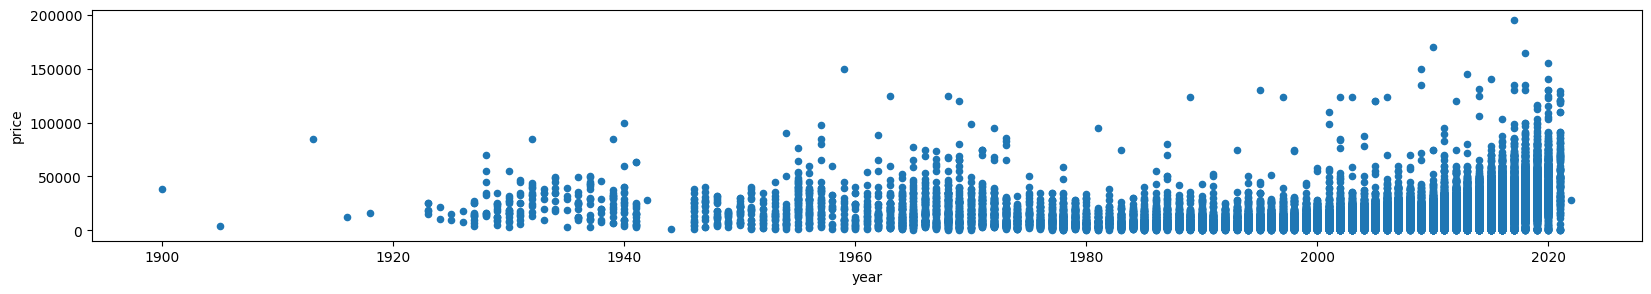

In [22]:
df.plot(
    kind='scatter',
    x='year',
    y='price',
    figsize=(20, 3)
)

i've noticed three issues:  
- there is a gap after 1940
- there is a kind of relationship between price and year after 1980
- there is missing data in 2022  
so I will filter the data beyond 1980 and before 2022

In [23]:
df = df.query('year > 1980 and year < 2022')

<Axes: xlabel='year', ylabel='price'>

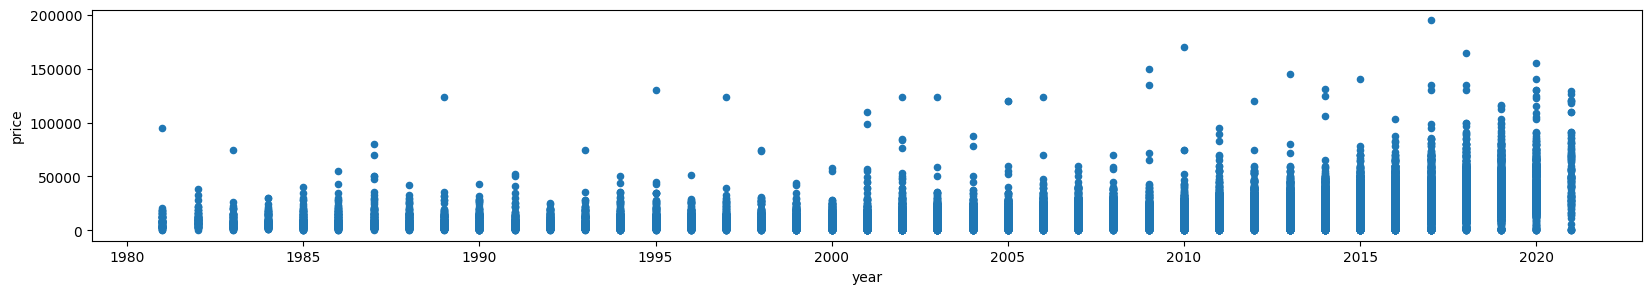

In [24]:
df.plot(
    kind='scatter',
    x='year',
    y='price',
    figsize=(20, 3)
)

In [25]:
df.head()

price  year manufacturer  condition    cylinders    fuel  odometer  \
31  15000  2013         ford  excellent  6 cylinders     gas    128000   
55  19900  2004         ford       good  8 cylinders  diesel     88000   
59  14000  2012        honda  excellent  6 cylinders     gas     95000   
65  22500  2001         ford       good  8 cylinders  diesel    144700   
73  15000  2017        dodge  excellent  8 cylinders     gas     90000   

   title_status transmission drive       size      type paint_color  
31        clean    automatic   rwd  full-size     truck       black  
55        clean    automatic   4wd  full-size    pickup        blue  
59        clean    automatic   fwd  full-size  mini-van      silver  
65        clean       manual   rwd  full-size     truck       white  
73      rebuilt    automatic   rwd   mid-size     sedan        grey

In [26]:
df['car_age'] = 2021 - df['year']

C:\Users\wpu0001\AppData\Local\Temp\ipykernel_17204\185816638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['car_age'] = 2021 - df['year']


In [27]:
df = df.drop(['year'], axis='columns')

In [28]:
df.describe()

price       odometer       car_age
count   55722.000000   55722.000000  55722.000000
mean    12526.487025  120764.233606     12.083719
std     11612.329443   58954.793832      6.782092
min       116.000000       0.000000      0.000000
25%      5000.000000   79718.250000      7.000000
50%      8950.000000  119895.500000     11.000000
75%     15988.000000  160000.000000     16.000000
max    195000.000000  285406.000000     40.000000

<Axes: xlabel='[odometer]', ylabel='[price]'>

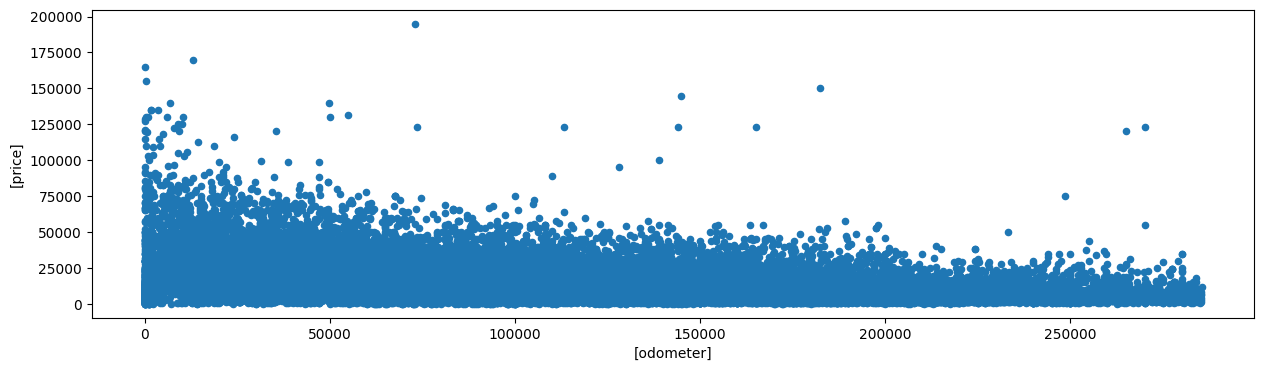

In [29]:
df.plot(
    kind='scatter',
    x=['odometer'],
    y=['price'],
    figsize=(15, 4)
)

Now the data has made sense, there is an inverse relationship between the price and the odometer, when odometer become more larger, the cheaper the car becomes, and so on...

### categorize price column

In [30]:
bins = [100, 2_000, 10_000, 25_000, float('inf')]
labels = ['low', 'mid', 'high', 'luxury']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels)

In [31]:
df['price_category'].value_counts()

price_category
mid       29050
high      17772
luxury     6126
low        2774
Name: count, dtype: int64

## Preparing data for training

### Taking 10_000 rows from the data as a sample

In [32]:
df_sample = df.sample(10_000)

In [33]:
df_sample['price_category'].value_counts()

price_category
mid       5207
high      3145
luxury    1120
low        528
Name: count, dtype: int64

In [34]:
df_sample.describe()

price       odometer       car_age
count   10000.000000   10000.000000  10000.000000
mean    12487.470800  120689.841200     12.052700
std     11541.199043   59257.468666      6.776379
min       150.000000       0.000000      0.000000
25%      5000.000000   78817.750000      7.000000
50%      8950.000000  119665.000000     11.000000
75%     15900.000000  161127.750000     16.000000
max    144832.000000  285387.000000     40.000000

In [35]:
df_sample

price   manufacturer  condition    cylinders    fuel  odometer  \
139113   9900           ford       good  8 cylinders  diesel    243336   
14472    3800          buick       good  6 cylinders     gas     80500   
62243    4000  mercedes-benz       good  8 cylinders     gas    130000   
297787   5995           ford       good  4 cylinders     gas     90000   
164805  18999           ford  excellent  8 cylinders     gas    181235   
...       ...            ...        ...          ...     ...       ...   
298718   8495           ford       good  8 cylinders     gas    165000   
198497   9999         toyota  excellent  4 cylinders     gas     90000   
150462   6950           ford  excellent  6 cylinders     gas    163000   
182807   6500          honda  excellent  3 cylinders     gas     62500   
352374  29500           ford  excellent  6 cylinders     gas     72870   

       title_status transmission drive       size    type paint_color  \
139113        clean       manual   4wd  full-size  pickup       white   
14472         clean    automatic   rwd   mid-size   sedan         red   
62243         clean    automatic   rwd  full-size   coupe       black   
297787        clean    automatic   fwd    compact   sedan       black   
164805        clean    automatic   4wd  full-size  pickup       white   
...             ...          ...   ...        ...     ...         ...   
298718        clean    automatic   4wd  full-size  pickup       black   
198497        clean    automatic   4wd  full-size     SUV       white   
150462        clean    automatic   rwd   mid-size     SUV       white   
182807        clean       manual   4wd    compact   truck       white   
352374        clean    automatic   4wd  full-size  pickup         red   

        car_age price_category  
139113       22            mid  
14472        19            mid  
62243        17            mid  
297787        5            mid  
164805        9           high  
...         ...            ...  
298718       15            mid  
198497        9            mid  
150462       13            mid  
182807       27            mid  
352374        5         luxury  

[10000 rows x 14 columns]

### transfer some columns to numerical or dummies

In [36]:
df_sample['cylinders'] = (
    df_sample['cylinders']
    .str
    .extract(r'(\d+)')
    .fillna(0)
)

In [37]:
df_sample = df_sample.reset_index(drop=True)

In [38]:
df_sample = df_sample.drop(['price'], axis='columns')

In [39]:
df_sample = df_sample[[
 'odometer',     # ready
 'cylinders',    # ready
 'car_age',      # ready
 'manufacturer', # to_dummies
 'condition',    # to_numerical
 'fuel',         # to_dummies
 'title_status', # to_dummies
 'transmission', # to_dummies
 'drive',        # to_dummies
 'size',         # to_dummies
 'type',         # to_dummies
 'paint_color',  # to_dummies
 'price_category', # y
]]

In [40]:
df_sample['condition'].value_counts()

condition
excellent    4786
good         3369
like new     1298
fair          453
new            54
salvage        40
Name: count, dtype: int64

In [41]:
# logicaly sort the conditions
conditions = [
    'new',
    'like new',
    'excellent',
    'good',
    'fair',
    'salvage',
]
conditions_dict : dict[str, int] = {con: idx for con, idx in zip(conditions, range(len(conditions)))}
conditions_dict

{'new': 0, 'like new': 1, 'excellent': 2, 'good': 3, 'fair': 4, 'salvage': 5}

In [42]:
df_sample['condition'] = df_sample['condition'].apply(lambda x: conditions_dict[x])

In [43]:
columns = [
 'manufacturer', # to_dummies
 'fuel',         # to_dummies
 'title_status', # to_dummies
 'transmission', # to_dummies
 'drive',        # to_dummies
 'size',         # to_dummies
 'type',         # to_dummies
 'paint_color',  # to_dummies
]
df_ready = pd.get_dummies(df_sample, columns=columns, drop_first=True, dtype=int)

In [44]:
df_ready

odometer cylinders  car_age  condition price_category  \
0       243336         8       22          3            mid   
1        80500         6       19          3            mid   
2       130000         8       17          3            mid   
3        90000         4        5          3            mid   
4       181235         8        9          2           high   
...        ...       ...      ...        ...            ...   
9995    165000         8       15          3            mid   
9996     90000         4        9          2            mid   
9997    163000         6       13          2            mid   
9998     62500         3       27          2            mid   
9999     72870         6        5          2         luxury   

      manufacturer_buick  manufacturer_cadillac  manufacturer_chevrolet  \
0                      0                      0                       0   
1                      1                      0                       0   
2                      0                      0                       0   
3                      0                      0                       0   
4                      0                      0                       0   
...                  ...                    ...                     ...   
9995                   0                      0                       0   
9996                   0                      0                       0   
9997                   0                      0                       0   
9998                   0                      0                       0   
9999                   0                      0                       0   

      manufacturer_chrysler  manufacturer_dodge  ...  paint_color_brown  \
0                         0                   0  ...                  0   
1                         0                   0  ...                  0   
2                         0                   0  ...                  0   
3                         0                   0  ...                  0   
4                         0                   0  ...                  0   
...                     ...                 ...  ...                ...   
9995                      0                   0  ...                  0   
9996                      0                   0  ...                  0   
9997                      0                   0  ...                  0   
9998                      0                   0  ...                  0   
9999                      0                   0  ...                  0   

      paint_color_custom  paint_color_green  paint_color_grey  \
0                      0                  0                 0   
1                      0                  0                 0   
2                      0                  0                 0   
3                      0                  0                 0   
4                      0                  0                 0   
...                  ...                ...               ...   
9995                   0                  0                 0   
9996                   0                  0                 0   
9997                   0                  0                 0   
9998                   0                  0                 0   
9999                   0                  0                 0   

      paint_color_orange  paint_color_purple  paint_color_red  \
0                      0                   0                0   
1                      0                   0                1   
2                      0                   0                0   
3                      0                   0                0   
4                      0                   0                0   
...                  ...                 ...              ...   
9995                   0                   0                0   
9996                   0                   0                0   
9997                   0                   0                0   
9998            

In [45]:
y = df_ready[['price_category']]
X = df_ready.drop(['price_category'], axis='columns')

# Training Models

## spliting data into train and test

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## define some utilities functions

In [48]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score

In [49]:
def result(y_test, y_predicted) -> list[str]:
    r: list = []
    r.append(f'{recall_score(y_test.to_numpy(), y_predicted, average='weighted'):.4f}')
    r.append(f'{accuracy_score(y_test.to_numpy(), y_predicted):.4f}')
    r.append(f'{precision_score(y_test.to_numpy(), y_predicted, average='weighted'):.4f}')
    r.append(f'{f1_score(y_test.to_numpy(), y_predicted, average='weighted'):.4f}')
    return r

In [50]:
def show_result(result: list[str]) -> str:
    headers: list[str] = ['recall_score', 'accuracy_score', 'precision_score', 'f1_score']
    for r, h in zip(result, headers):
        print(f'{h} = {r}')

## Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dtc_model = DecisionTreeClassifier()

In [53]:
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
y_predicted = dtc_model.predict(X_test)
y_predicted

array(['high', 'mid', 'mid', ..., 'high', 'luxury', 'mid'], dtype=object)

In [55]:
dtc_result = result(y_test, y_predicted)
show_result(dtc_result)

recall_score = 0.6915
accuracy_score = 0.6915
precision_score = 0.6969
f1_score = 0.6939


## logistic regression regressor

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
lr = LogisticRegression()

In [58]:
lr.fit(X_train, y_train)

C:\Users\wpu0001\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wpu0001\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
y_predicted = lr.predict(X_test)
y_predicted

array(['mid', 'mid', 'mid', ..., 'high', 'luxury', 'mid'], dtype=object)

In [60]:
lr_result = result(y_test, y_predicted)
show_result(lr_result)

recall_score = 0.6925
accuracy_score = 0.6925
precision_score = 0.6578
f1_score = 0.6687


C:\Users\wpu0001\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Naive Bayes Classifier

In [61]:
from sklearn.naive_bayes import GaussianNB

In [62]:
nbg = GaussianNB()

In [63]:
nbg.fit(X_train, y_train)

C:\Users\wpu0001\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [64]:
y_predicted = nbg.predict(X_test)
y_predicted

array(['high', 'mid', 'mid', ..., 'mid', 'luxury', 'mid'], dtype='<U6')

In [65]:
nbg_result = result(y_test, y_predicted)
show_result(nbg_result)

recall_score = 0.6600
accuracy_score = 0.6600
precision_score = 0.6301
f1_score = 0.6397


## Comparing Results

In [66]:
indexes: list[str] = ['dtc_result', 'lr_result', 'nbg_result']
headers: list[str] = ['recall_score', 'accuracy_score', 'precision_score', 'f1_score']

In [67]:
df_results = pd.DataFrame([dtc_result, lr_result, nbg_result], index=indexes, columns=headers)

In [68]:
df_results = df_results.transpose().reset_index()

In [69]:
df_results.columns = ['score' ,
                      'Decision_Tree_Classifier', 
                      'Logistic_Regression', 
                      'Naive_Bayes']

In [70]:
df_results['score'] = df_results['score'].str.replace('_score', '')

In [71]:
df_results['Decision_Tree_Classifier'] = df_results['Decision_Tree_Classifier'].astype(float)
df_results['Logistic_Regression'] = df_results['Logistic_Regression'].astype(float)
df_results['Naive_Bayes'] = df_results['Naive_Bayes'].astype(float)

In [72]:
df_results

score  Decision_Tree_Classifier  Logistic_Regression  Naive_Bayes
0     recall                    0.6915               0.6925       0.6600
1   accuracy                    0.6915               0.6925       0.6600
2  precision                    0.6969               0.6578       0.6301
3         f1                    0.6939               0.6687       0.6397